In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
%matplotlib inline

In [3]:
whale_data = Path("Starter_Code/Resources/whale_returns.csv")
algo_data = Path("Starter_Code/Resources/algo_returns.csv")
sp500_data = Path("Starter_Code/Resources/sp500_history.csv")

In [4]:
whale_df = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df = pd.read_csv(algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df = pd.read_csv(sp500_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [5]:
whale_df.dropna
algo_df.dropna
sp500_df.dropna

<bound method DataFrame.dropna of                Close
Date                
2019-04-23  $2933.68
2019-04-22  $2907.97
2019-04-18  $2905.03
2019-04-17  $2900.45
2019-04-16  $2907.06
...              ...
2012-10-05  $1460.93
2012-10-04  $1461.40
2012-10-03  $1450.99
2012-10-02  $1445.75
2012-10-01  $1444.49

[1649 rows x 1 columns]>

In [6]:
sp500_df = sp500_df['Close'].replace('[\$\,\.]',"",regex=True).astype(float)

In [7]:
sp500_returns = sp500_df.pct_change()

In [8]:
combined_df = pd.concat([whale_df, algo_df, sp500_returns], axis="columns", join="inner")

combined_df.sort_index(inplace=True)

combined_df.columns = ['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO. INC.', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2', 'SP500']

combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO. INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.004559
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929


In [9]:
combined_df = combined_df.drop(combined_df.index[0])
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO. INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


<AxesSubplot:xlabel='Date'>

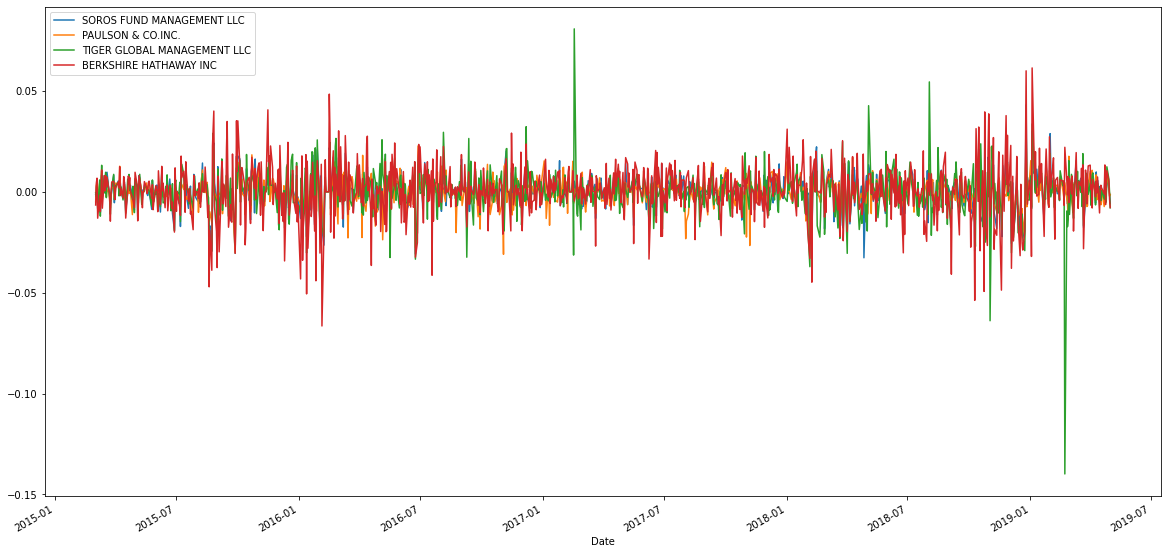

In [10]:
whale_df.plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

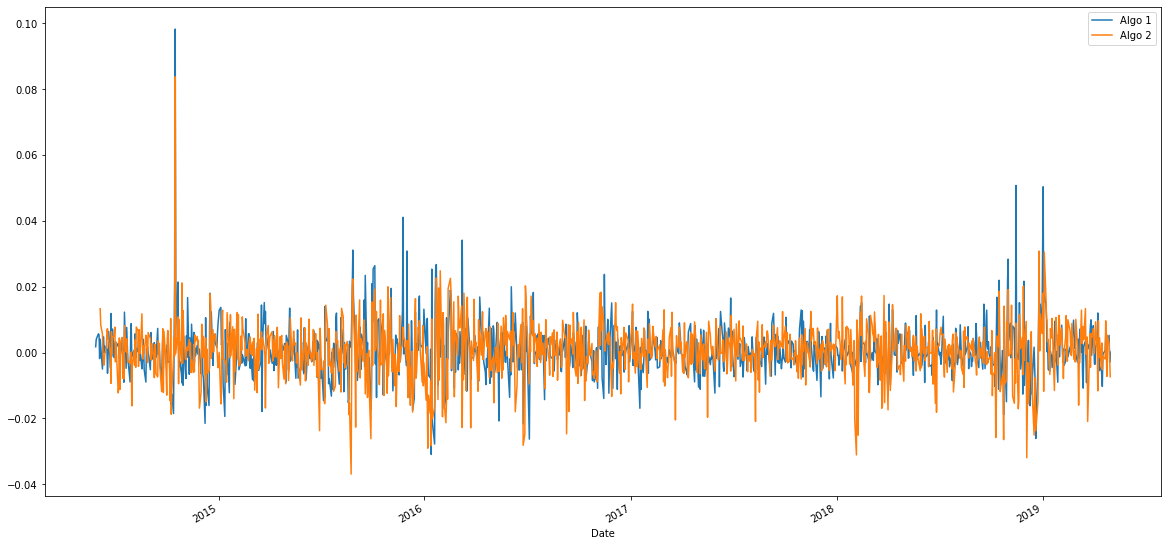

In [11]:
algo_df.plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

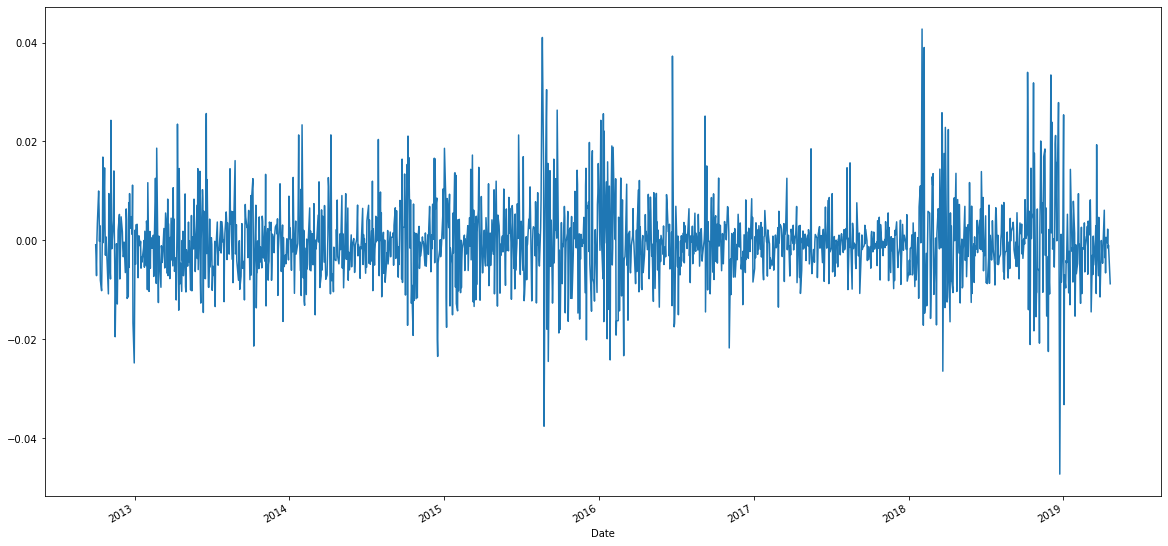

In [59]:
sp500_returns.plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

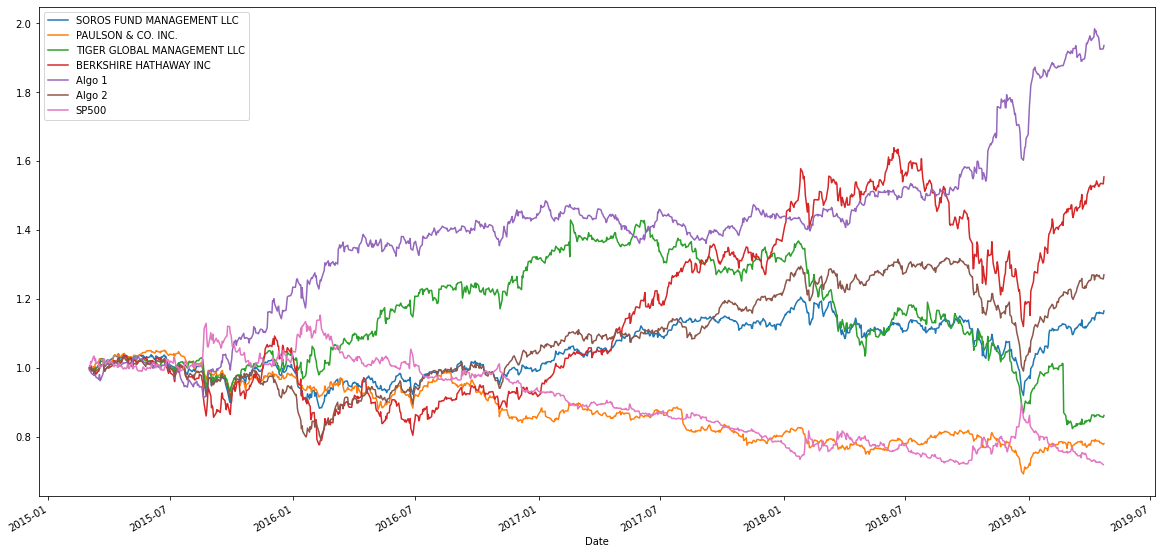

In [13]:
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.plot(figsize=(20,10))

<AxesSubplot:>

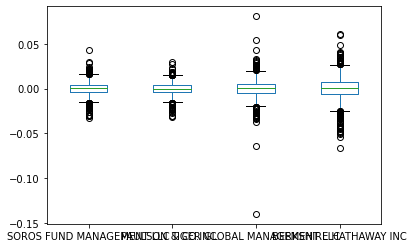

In [14]:
whale_df.plot(kind="box")

<AxesSubplot:>

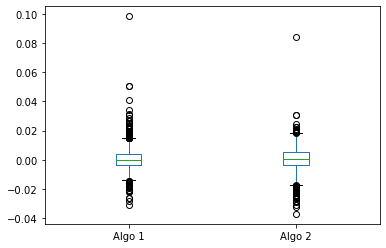

In [15]:
algo_df.plot(kind="box")

<AxesSubplot:>

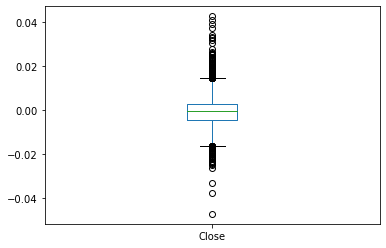

In [16]:
sp500_returns.plot(kind="box")

In [17]:
whale_df.std()

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [18]:
algo_df.std()

Algo 1    0.007972
Algo 2    0.008466
dtype: float64

In [19]:
sp500_returns.std()

0.008134642617809523

In [20]:
volatility = combined_df.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

PAULSON & CO. INC.             0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
SP500                          0.136313
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

In [21]:
# Tiger Global Management LLC & Berkshire Hathaway Inc portfolios are riskier than the SP500.

<AxesSubplot:xlabel='Date'>

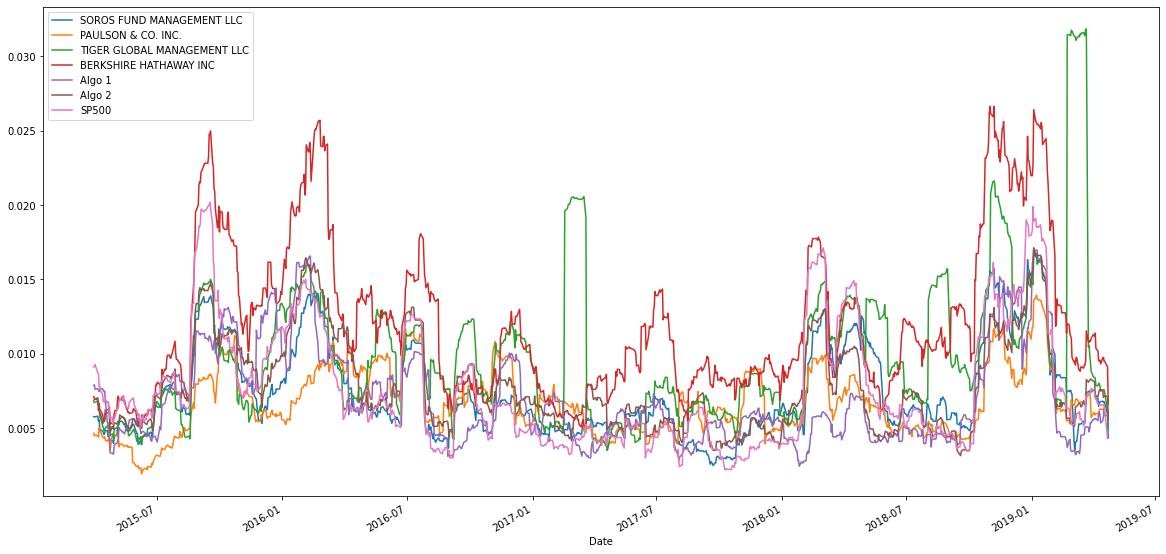

In [22]:
combined_df.rolling(window=21).std().plot(figsize=(20,10))

In [23]:
correlation = combined_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO. INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.000574
PAULSON & CO. INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,-0.001505
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,-0.013856
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,-0.033963
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,-0.002192
SP500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


<AxesSubplot:>

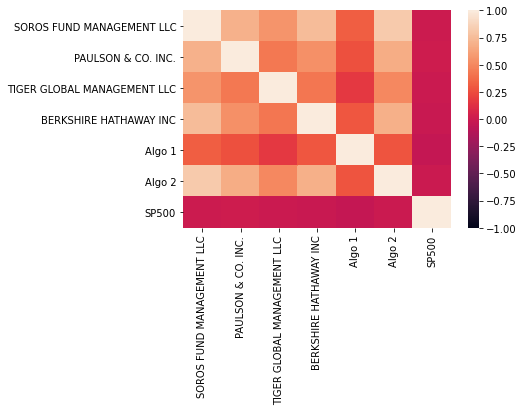

In [24]:
sns.heatmap(correlation, vmin=-1, vmax=1)

In [25]:
correlation.sum(axis=0).sort_values()

SP500                          0.962607
Algo 1                         2.300752
TIGER GLOBAL MANAGEMENT LLC    3.090442
PAULSON & CO. INC.             3.640557
BERKSHIRE HATHAWAY INC         3.690665
Algo 2                         3.986572
SOROS FUND MANAGEMENT LLC      4.164175
dtype: float64

<AxesSubplot:>

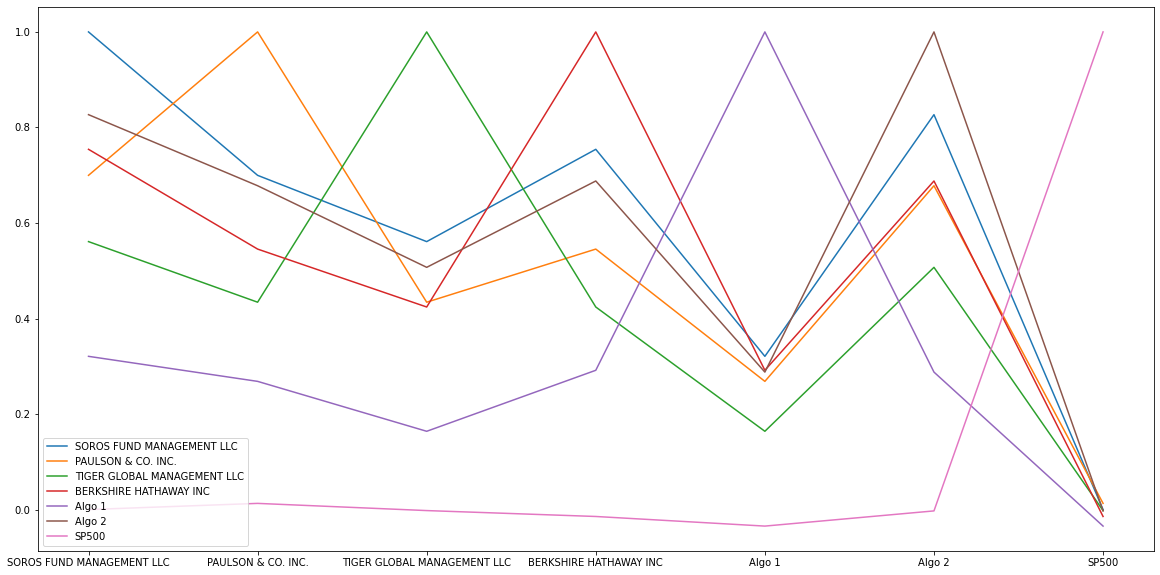

In [26]:
correlation.plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

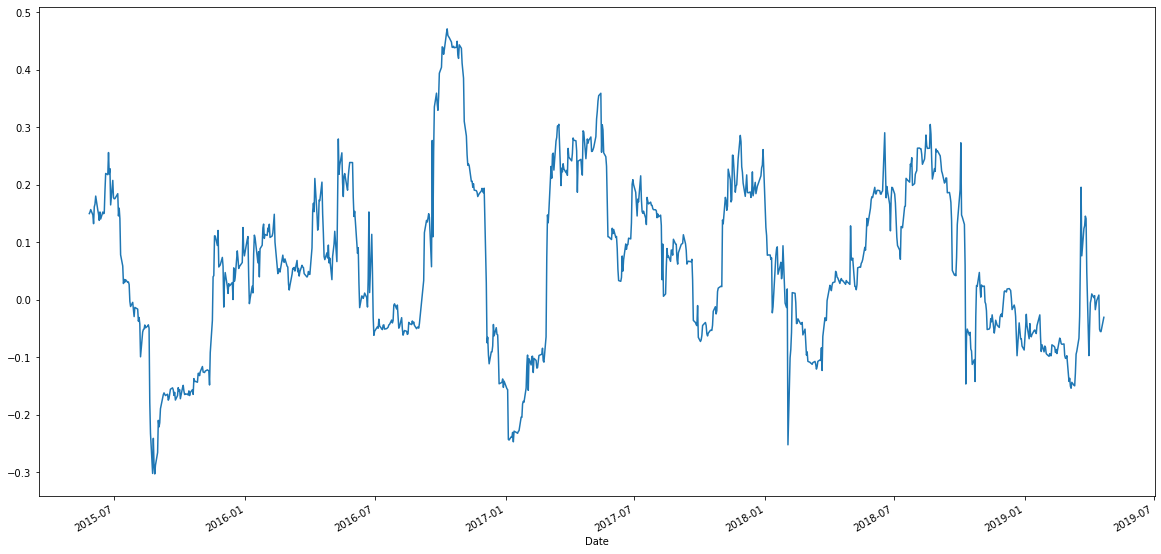

In [27]:
rolling_algo2_cov = combined_df['Algo 2'].rolling(window=60).cov(combined_df['SP500'])

rolling_variance = combined_df['SP500'].rolling(window=60).var()

rolling_algo2_beta = rolling_algo2_cov / rolling_variance

rolling_algo2_beta.plot(figsize=(20,10))

In [28]:
sharpe_ratios = ((combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252)))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO. INC.            -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500                         -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

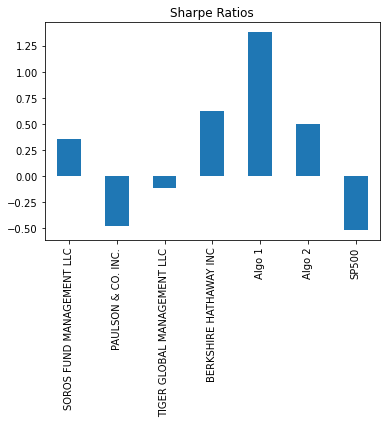

In [29]:
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [30]:
# The algorithmic strategies outperformed both the S&P 500 as well as the whale's portfolios

In [31]:
amd_data = Path('amd_historical.csv')

amd_df = pd.read_csv(amd_data, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)

amd_df.drop(columns=['Symbol'], inplace=True)

amd_df.head()

,NOCP
Trade DATE,
2019-05-13,26.24
2019-05-10,27.96
2019-05-09,27.21
2019-05-08,27.09
2019-05-07,26.66


In [32]:
mu_data = Path('mu_historical.csv')

mu_df = pd.read_csv(mu_data, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)

mu_df.drop(columns=['Symbol'], inplace=True)

mu_df.head()

,NOCP
Trade DATE,
2019-05-13,37.38
2019-05-10,38.94
2019-05-09,39.27
2019-05-08,39.75
2019-05-07,40.26


In [33]:
goog_data = Path('goog_historical.csv')

goog_df = pd.read_csv(goog_data, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)

goog_df.drop(columns=['Symbol'], inplace=True)

goog_df.head()

,NOCP
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [34]:
my_portfolio = pd.concat([goog_df, mu_df, amd_df], axis='columns', join='inner')

my_portfolio.columns = ['GOOG', 'MU', 'AMD']

my_portfolio.head()

,GOOG,MU,AMD
Trade DATE,,,
2019-05-09,1162.38,39.27,27.21
2019-05-08,1166.27,39.75,27.09
2019-05-07,1174.10,40.26,26.66
2019-05-06,1189.39,42.13,27.42
2019-05-03,1185.40,43.33,28.22


In [39]:
my_portfolio_return = my_portfolio.pct_change() 

my_portfolio_return.sort_index()

my_portfolio_return.dropna(inplace=True)

my_portfolio_return.head()

,GOOG,MU,AMD
Trade DATE,,,
2019-05-08,0.003347,0.012223,-0.004410
2019-05-07,0.006714,0.012830,-0.015873
2019-05-06,0.013023,0.046448,0.028507
2019-05-03,-0.003355,0.028483,0.029176
2019-05-02,-0.019226,-0.017771,0.002481


In [42]:
weights = [0.3, 0.3, 0.3]

my_portfolio_return = my_portfolio_return.dot(weights)
my_portfolio_return.head()

Trade DATE
2019-05-08    0.003348
2019-05-07    0.001101
2019-05-06    0.026393
2019-05-03    0.016291
2019-05-02   -0.010355
dtype: float64

In [45]:
cumulative_return = (1 + my_portfolio_return).cumprod() - 1
cumulative_return.head()

Trade DATE
2019-05-08    0.003348
2019-05-07    0.004453
2019-05-06    0.030964
2019-05-03    0.047759
2019-05-02    0.036910
dtype: float64

In [61]:
all_portfolio_return = pd.concat([my_portfolio_return, whale_df, algo_df, sp500_returns], axis='columns', join='inner')

all_portfolio_return.dropna(inplace=True)

all_portfolio_return.columns = ['My Portfolio', 'SOROS FUND MANAGEMENT LLC', 'PAULSON & CO. INC.', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2', 'SP500']

all_portfolio_return.head()


,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO. INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
2019-04-22,0.002944,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764
2019-04-18,-0.008319,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011
2019-04-17,-0.003795,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-16,-0.000145,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-15,-0.014514,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509


In [65]:
all_portfolio_return_std = all_portfolio_return.std() * np.sqrt(252)

all_portfolio_return_std.sort_index(inplace=True)

all_portfolio_return_std

Algo 1                         0.134213
Algo 2                         0.139787
BERKSHIRE HATHAWAY INC         0.247833
My Portfolio                   0.350410
PAULSON & CO. INC.             0.117177
SOROS FUND MANAGEMENT LLC      0.147125
SP500                          0.152613
TIGER GLOBAL MANAGEMENT LLC    0.233393
dtype: float64

<AxesSubplot:>

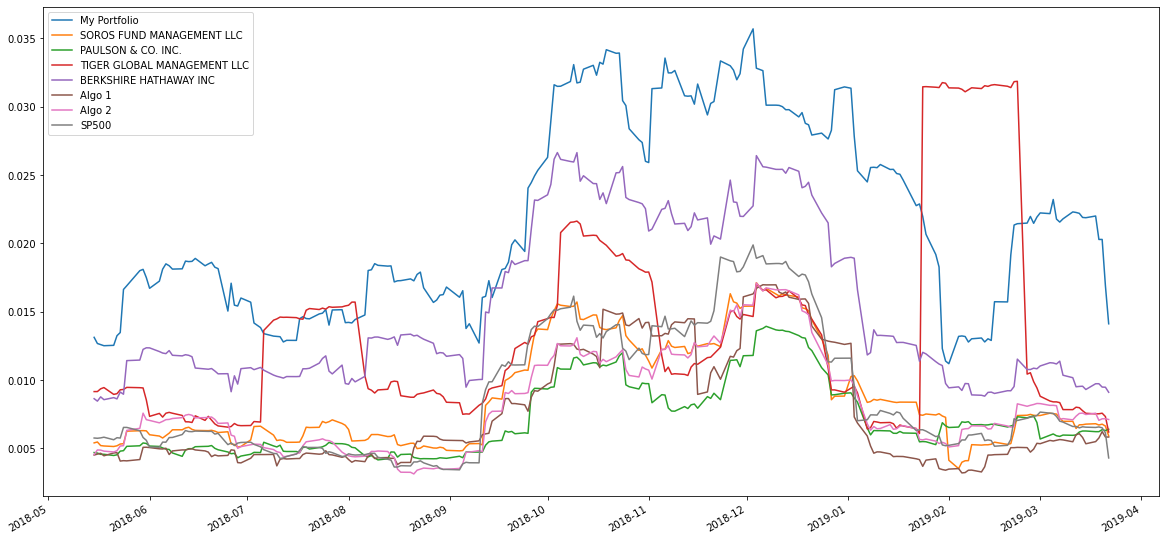

In [70]:
all_portfolio_return.rolling(window=21).std().plot(figsize=(20,10))

In [73]:
all_portfolio_correlation = all_portfolio_return.corr()
all_portfolio_correlation

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO. INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
My Portfolio,1.000000,-0.017363,-0.038458,-0.011730,-0.060766,-0.005941,-0.020754,0.731141
SOROS FUND MANAGEMENT LLC,-0.017363,1.000000,0.791802,0.477856,0.816197,0.336908,0.862666,-0.028213
PAULSON & CO. INC.,-0.038458,0.791802,1.000000,0.484878,0.650390,0.360726,0.783935,-0.059888
TIGER GLOBAL MANAGEMENT LLC,-0.011730,0.477856,0.484878,1.000000,0.324311,0.113677,0.408382,0.005674
BERKSHIRE HATHAWAY INC,-0.060766,0.816197,0.650390,0.324311,1.000000,0.325985,0.782117,-0.038857
Algo 1,-0.005941,0.336908,0.360726,0.113677,0.325985,1.000000,0.364498,-0.054487
Algo 2,-0.020754,0.862666,0.783935,0.408382,0.782117,0.364498,1.000000,-0.043185
SP500,0.731141,-0.028213,-0.059888,0.005674,-0.038857,-0.054487,-0.043185,1.000000


<AxesSubplot:>

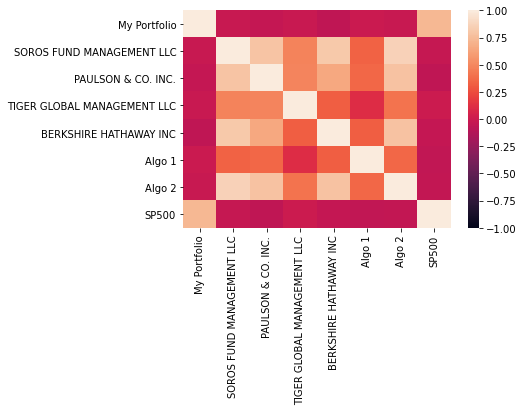

In [78]:
sns.heatmap(correlation, vmin=-1, vmax=1)

In [82]:
all_portfolio_cov = all_portfolio_return['My Portfolio'].cov(all_portfolio_return['SP500'])

all_portfolio_var = all_portfolio_return['SP500'].var()

all_portfolio_beta = all_portfolio_cov / all_portfolio_var

all_portfolio_beta

1.6787502820033786

In [79]:
all_portfolio_sharpe_ratio = (all_portfolio_return.mean() * 252)/(all_portfolio_return.std() * np.sqrt(252))
all_portfolio_sharpe_ratio

My Portfolio                  -0.348378
SOROS FUND MANAGEMENT LLC      0.380811
PAULSON & CO. INC.             0.228059
TIGER GLOBAL MANAGEMENT LLC   -1.068903
BERKSHIRE HATHAWAY INC         0.103224
Algo 1                         1.998187
Algo 2                        -0.005192
SP500                         -0.477497
dtype: float64

<AxesSubplot:title={'center':'All Sharpe Ratios'}>

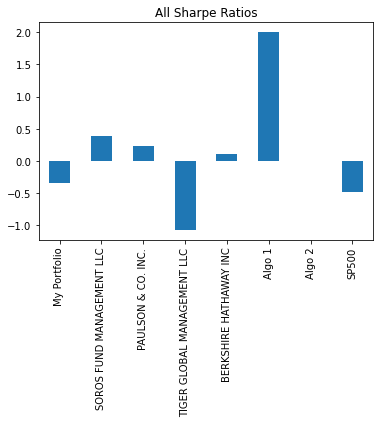

In [83]:
all_portfolio_sharpe_ratio.plot(kind="bar", title="All Sharpe Ratios")

In [85]:
# My portfolio does slightly better than the S&P 500 but still underperforms the algorithmic strategies 